In [ ]:
import numpy as np
import torch
import networkx as nx
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import torchvision.datasets
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

X_train = X_train.float()
X_test = X_test.float()

X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTNet(torch.nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 200)
        self.ac1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(200, 100)
        self.ac2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(100, 10)         
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return x
    
mnist_net = MNISTNet()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# mnist_net = mnist_net.to(device)

In [ ]:
batch_size = 1000

test_accuracy_history = []
test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(10):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9242)
tensor(0.9453)
tensor(0.9569)
tensor(0.9614)
tensor(0.9645)
tensor(0.9665)
tensor(0.9656)
tensor(0.9686)
tensor(0.9718)
tensor(0.9722)


In [ ]:
for param_tensor in mnist_net.state_dict():
    if param_tensor == 'fc1.weight':
        weights1_2 = mnist_net.state_dict()[param_tensor].numpy()
    elif param_tensor == 'fc2.weight':
        weights2_3 = mnist_net.state_dict()[param_tensor].numpy()
    elif param_tensor == 'fc3.weight':
        weights3_4 = mnist_net.state_dict()[param_tensor].numpy()

In [ ]:
G = nx.Graph()
    
layer_2,layer_1 = weights1_2.shape    
layer_3,layer_2 = weights2_3.shape 
layer_4,layer_3 = weights3_4.shape 

for i in range(0, layer_1 + layer_2 + layer_3 + layer_4):
    G.add_node(i)

for j in range(0, layer_2):
    for i in range(0, layer_1):
        G.add_edge(i, layer_1 + j, weight = weights1_2[j][i])

node_count = layer_1 + layer_2

for j in range(0, layer_3):
    for i in range(0, layer_2):
        G.add_edge(layer_1 + i, node_count + j, weight = weights2_3[j][i])

node_count = node_count + layer_3

for j in range(0, layer_4):
    for i in range(0, layer_3):
        G.add_edge(layer_1 + layer_2 + i,node_count + j, weight = weights3_4[j][i])

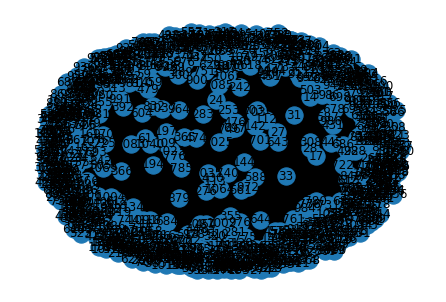

In [ ]:
nx.draw(G, with_labels = True)

# Красиво)))

In [ ]:
print('Nodes:',G.number_of_nodes())
print('Edges:',G.number_of_edges())

Nodes: 1094
Edges: 177800


In [ ]:
G.degree() 

DegreeView({0: 200, 1: 200, 2: 200, 3: 200, 4: 200, 5: 200, 6: 200, 7: 200, 8: 200, 9: 200, 10: 200, 11: 200, 12: 200, 13: 200, 14: 200, 15: 200, 16: 200, 17: 200, 18: 200, 19: 200, 20: 200, 21: 200, 22: 200, 23: 200, 24: 200, 25: 200, 26: 200, 27: 200, 28: 200, 29: 200, 30: 200, 31: 200, 32: 200, 33: 200, 34: 200, 35: 200, 36: 200, 37: 200, 38: 200, 39: 200, 40: 200, 41: 200, 42: 200, 43: 200, 44: 200, 45: 200, 46: 200, 47: 200, 48: 200, 49: 200, 50: 200, 51: 200, 52: 200, 53: 200, 54: 200, 55: 200, 56: 200, 57: 200, 58: 200, 59: 200, 60: 200, 61: 200, 62: 200, 63: 200, 64: 200, 65: 200, 66: 200, 67: 200, 68: 200, 69: 200, 70: 200, 71: 200, 72: 200, 73: 200, 74: 200, 75: 200, 76: 200, 77: 200, 78: 200, 79: 200, 80: 200, 81: 200, 82: 200, 83: 200, 84: 200, 85: 200, 86: 200, 87: 200, 88: 200, 89: 200, 90: 200, 91: 200, 92: 200, 93: 200, 94: 200, 95: 200, 96: 200, 97: 200, 98: 200, 99: 200, 100: 200, 101: 200, 102: 200, 103: 200, 104: 200, 105: 200, 106: 200, 107: 200, 108: 200, 109: 200